In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nba1718 = pd.read_csv('2017-18_standings.csv')

In [3]:
#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
season = nba1718[(nba1718['gameWon'] != 0) | (nba1718['gameLost']!= 0) ]

In [4]:
list(season.columns) 

['stDate',
 'teamAbbr',
 'rank',
 'rankOrd',
 'gameWon',
 'gameLost',
 'stk',
 'stkType',
 'stkTot',
 'gameBack',
 'ptsFor',
 'ptsAgnst',
 'homeWin',
 'homeLoss',
 'awayWin',
 'awayLoss',
 'confWin',
 'confLoss',
 'lastFive',
 'lastTen',
 'gamePlay',
 'ptsScore',
 'ptsAllow',
 'ptsDiff',
 'opptGmPlay',
 'opptGmWon',
 'opptOpptGmPlay',
 'opptOpptGmWon',
 'sos',
 'rel%Indx',
 'mov',
 'srs',
 'pw%',
 'pyth%13.91',
 'wpyth13.91',
 'lpyth13.91',
 'pyth%16.5',
 'wpyth16.5',
 'lpyth16.5']

In [5]:
season = season.drop(['lastFive',
 'lastTen',
 'gamePlay',
 'ptsScore',
 'ptsAllow',
 'ptsDiff',
 'opptGmPlay',
 'opptGmWon',
 'opptOpptGmPlay',
 'opptOpptGmWon',
 'sos',
 'rel%Indx',
 'mov',
 'srs',
 'pw%',
 'pyth%13.91',
 'wpyth13.91',
 'lpyth13.91',
 'pyth%16.5',
 'wpyth16.5',
 'lpyth16.5'], axis = 1)

In [6]:
#season = season.drop(['rankOrd', 'stk', 'gameBack', 'ptsFor', 'ptsAgainst'], axis = 1)
list(season.columns) 



['stDate',
 'teamAbbr',
 'rank',
 'rankOrd',
 'gameWon',
 'gameLost',
 'stk',
 'stkType',
 'stkTot',
 'gameBack',
 'ptsFor',
 'ptsAgnst',
 'homeWin',
 'homeLoss',
 'awayWin',
 'awayLoss',
 'confWin',
 'confLoss']

In [7]:
season = season.drop(['rankOrd'], axis=1)

In [8]:
season = season.drop(['stkTot', 'gameBack'], axis = 1)

In [9]:
season = season.drop(['ptsFor', 'ptsAgnst'], axis = 1)

In [10]:
season

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss
2,2017-10-17,BOS,15,0,1,L1,loss,0,0,0,1,0,1
5,2017-10-17,CLE,1,1,0,W1,win,1,0,0,0,1,0
9,2017-10-17,GS,15,0,1,L1,loss,0,1,0,0,0,1
10,2017-10-17,HOU,1,1,0,W1,win,0,0,1,0,1,0
30,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2018-04-11,SA,7,47,35,L1,loss,33,8,14,27,29,23
5036,2018-04-11,SAC,12,27,55,W1,win,14,27,13,28,14,38
5037,2018-04-11,TOR,1,59,23,L1,loss,34,7,25,16,40,12
5038,2018-04-11,UTA,4,48,34,L1,loss,28,13,20,21,34,18


In [11]:
gameTot = season['gameWon'] + season['gameLost']


In [12]:
season = season.assign(gameTotal = gameTot)
season

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal
2,2017-10-17,BOS,15,0,1,L1,loss,0,0,0,1,0,1,1
5,2017-10-17,CLE,1,1,0,W1,win,1,0,0,0,1,0,1
9,2017-10-17,GS,15,0,1,L1,loss,0,1,0,0,0,1,1
10,2017-10-17,HOU,1,1,0,W1,win,0,0,1,0,1,0,1
30,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2018-04-11,SA,7,47,35,L1,loss,33,8,14,27,29,23,82
5036,2018-04-11,SAC,12,27,55,W1,win,14,27,13,28,14,38,82
5037,2018-04-11,TOR,1,59,23,L1,loss,34,7,25,16,40,12,82
5038,2018-04-11,UTA,4,48,34,L1,loss,28,13,20,21,34,18,82


In [13]:
winPCT = (season['gameWon']) / (season['gameWon'] + season['gameLost'])
winPCT

2       0.000000
5       1.000000
9       0.000000
10      1.000000
30      1.000000
          ...   
5035    0.573171
5036    0.329268
5037    0.719512
5038    0.585366
5039    0.524390
Length: 5008, dtype: float64

In [14]:
season = season.assign(winPCT = winPCT)
season

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
2,2017-10-17,BOS,15,0,1,L1,loss,0,0,0,1,0,1,1,0.000000
5,2017-10-17,CLE,1,1,0,W1,win,1,0,0,0,1,0,1,1.000000
9,2017-10-17,GS,15,0,1,L1,loss,0,1,0,0,0,1,1,0.000000
10,2017-10-17,HOU,1,1,0,W1,win,0,0,1,0,1,0,1,1.000000
30,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2018-04-11,SA,7,47,35,L1,loss,33,8,14,27,29,23,82,0.573171
5036,2018-04-11,SAC,12,27,55,W1,win,14,27,13,28,14,38,82,0.329268
5037,2018-04-11,TOR,1,59,23,L1,loss,34,7,25,16,40,12,82,0.719512
5038,2018-04-11,UTA,4,48,34,L1,loss,28,13,20,21,34,18,82,0.585366


In [15]:
#change Win/Loss to 1/0
#season['stkType'] = season.stkType.eq('win').mul(1)

In [16]:
#season = season.drop(['stDate'], axis = 1)

In [17]:
season

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
2,2017-10-17,BOS,15,0,1,L1,loss,0,0,0,1,0,1,1,0.000000
5,2017-10-17,CLE,1,1,0,W1,win,1,0,0,0,1,0,1,1.000000
9,2017-10-17,GS,15,0,1,L1,loss,0,1,0,0,0,1,1,0.000000
10,2017-10-17,HOU,1,1,0,W1,win,0,0,1,0,1,0,1,1.000000
30,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2018-04-11,SA,7,47,35,L1,loss,33,8,14,27,29,23,82,0.573171
5036,2018-04-11,SAC,12,27,55,W1,win,14,27,13,28,14,38,82,0.329268
5037,2018-04-11,TOR,1,59,23,L1,loss,34,7,25,16,40,12,82,0.719512
5038,2018-04-11,UTA,4,48,34,L1,loss,28,13,20,21,34,18,82,0.585366


In [18]:
season.sort_values(by=['teamAbbr','gameTotal'])

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
30,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0,1,1.000000
60,2017-10-19,ATL,1,1,0,W1,win,0,0,1,0,0,0,1,1.000000
90,2017-10-20,ATL,4,1,1,L1,loss,0,0,1,1,0,1,2,0.500000
120,2017-10-21,ATL,7,1,1,L1,loss,0,0,1,1,0,1,2,0.500000
150,2017-10-22,ATL,10,1,2,L2,loss,0,0,1,2,0,2,3,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,2018-04-07,WAS,8,42,38,L4,loss,22,18,20,20,27,23,80,0.525000
4949,2018-04-08,WAS,8,42,38,L4,loss,22,18,20,20,27,23,80,0.525000
4979,2018-04-09,WAS,8,42,38,L4,loss,22,18,20,20,27,23,80,0.525000
5009,2018-04-10,WAS,7,43,38,W1,win,23,18,20,20,28,23,81,0.530864


In [19]:
#df = df.drop_duplicates('COL2')
#season = season.drop_duplicates('gameTotal')

In [20]:
atlDF = season[season['teamAbbr']== 'ATL']
atlDF = atlDF.drop_duplicates('gameTotal')
atlDF

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
30,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0,1,1.000000
90,2017-10-20,ATL,4,1,1,L1,loss,0,0,1,1,0,1,2,0.500000
150,2017-10-22,ATL,10,1,2,L2,loss,0,0,1,2,0,2,3,0.333333
180,2017-10-23,ATL,12,1,3,L3,loss,0,0,1,3,0,3,4,0.250000
270,2017-10-26,ATL,13,1,4,L4,loss,0,0,1,4,0,4,5,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,2018-04-03,ATL,15,22,56,L1,loss,16,23,6,33,10,38,78,0.282051
4800,2018-04-04,ATL,15,22,57,L2,loss,16,24,6,33,10,39,79,0.278481
4860,2018-04-06,ATL,15,23,57,W1,win,16,24,7,33,11,39,80,0.287500
4920,2018-04-08,ATL,15,24,57,W2,win,16,24,8,33,12,39,81,0.296296


In [21]:
season

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
2,2017-10-17,BOS,15,0,1,L1,loss,0,0,0,1,0,1,1,0.000000
5,2017-10-17,CLE,1,1,0,W1,win,1,0,0,0,1,0,1,1.000000
9,2017-10-17,GS,15,0,1,L1,loss,0,1,0,0,0,1,1,0.000000
10,2017-10-17,HOU,1,1,0,W1,win,0,0,1,0,1,0,1,1.000000
30,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2018-04-11,SA,7,47,35,L1,loss,33,8,14,27,29,23,82,0.573171
5036,2018-04-11,SAC,12,27,55,W1,win,14,27,13,28,14,38,82,0.329268
5037,2018-04-11,TOR,1,59,23,L1,loss,34,7,25,16,40,12,82,0.719512
5038,2018-04-11,UTA,4,48,34,L1,loss,28,13,20,21,34,18,82,0.585366


In [22]:
season.teamAbbr.unique()

array(['BOS', 'CLE', 'GS', 'HOU', 'ATL', 'BKN', 'CHA', 'DAL', 'DEN',
       'DET', 'IND', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'ORL', 'PHI',
       'PHO', 'POR', 'SA', 'SAC', 'UTA', 'WAS', 'CHI', 'LAC', 'LAL', 'NY',
       'OKC', 'TOR'], dtype=object)

In [23]:
teams = ['BOS', 'CLE', 'GS', 'HOU', 'ATL', 'BKN', 'CHA', 'DAL', 'DEN',
       'DET', 'IND', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'ORL', 'PHI',
       'PHO', 'POR', 'SA', 'SAC', 'UTA', 'WAS', 'CHI', 'LAC', 'LAL', 'NY',
       'OKC', 'TOR']

In [24]:
#atlDF = season[season['teamAbbr']== 'ATL']
#atlDF = atlDF.drop_duplicates('gameTotal')

bosDF = season[season['teamAbbr']=='BOS'].drop_duplicates('gameTotal')


In [25]:
nbaseasondf = pd.DataFrame()
teamdf = season[season['teamAbbr']=='BOS'].drop_duplicates('gameTotal')
nbaseasondf = pd.concat([nbaseasondf , teamdf], ignore_index=True)

In [26]:
#df_row_reindex = pd.concat([df1, df2], ignore_index=True)

In [27]:
nbaseasondf

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
0,2017-10-17,BOS,15,0,1,L1,loss,0,0,0,1,0,1,1,0.000000
1,2017-10-18,BOS,15,0,2,L2,loss,0,1,0,1,0,2,2,0.000000
2,2017-10-20,BOS,11,1,2,W1,win,0,1,1,1,1,2,3,0.333333
3,2017-10-24,BOS,7,2,2,W2,win,1,1,1,1,2,2,4,0.500000
4,2017-10-26,BOS,3,3,2,W3,win,1,1,2,1,3,2,5,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2018-04-04,BOS,2,53,25,L2,loss,25,13,28,12,31,17,78,0.679487
78,2018-04-06,BOS,2,54,25,W1,win,26,13,28,12,32,17,79,0.683544
79,2018-04-08,BOS,2,54,26,L1,loss,26,14,28,12,32,18,80,0.675000
80,2018-04-10,BOS,2,54,27,L2,loss,26,14,28,13,32,19,81,0.666667


In [28]:
teamdf = pd.DataFrame()
nbaseasondf = pd.DataFrame()
for team in teams:
    print(team)
    teamdf = season[season['teamAbbr']== team].drop_duplicates('gameTotal')
    nbaseasondf = pd.concat([nbaseasondf , teamdf], ignore_index=True)
    print('done')

    

BOS
done
CLE
done
GS
done
HOU
done
ATL
done
BKN
done
CHA
done
DAL
done
DEN
done
DET
done
IND
done
MEM
done
MIA
done
MIL
done
MIN
done
NO
done
ORL
done
PHI
done
PHO
done
POR
done
SA
done
SAC
done
UTA
done
WAS
done
CHI
done
LAC
done
LAL
done
NY
done
OKC
done
TOR
done


In [29]:
fullnba1718 = nbaseasondf

In [30]:
fullnba1718

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
0,2017-10-17,BOS,15,0,1,L1,loss,0,0,0,1,0,1,1,0.000000
1,2017-10-18,BOS,15,0,2,L2,loss,0,1,0,1,0,2,2,0.000000
2,2017-10-20,BOS,11,1,2,W1,win,0,1,1,1,1,2,3,0.333333
3,2017-10-24,BOS,7,2,2,W2,win,1,1,1,1,2,2,4,0.500000
4,2017-10-26,BOS,3,3,2,W3,win,1,1,2,1,3,2,5,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2018-04-04,TOR,1,56,22,W1,win,32,7,24,15,37,11,78,0.717949
2456,2018-04-06,TOR,1,57,22,W2,win,33,7,24,15,38,11,79,0.721519
2457,2018-04-08,TOR,1,58,22,W3,win,34,7,24,15,39,11,80,0.725000
2458,2018-04-09,TOR,1,59,22,W4,win,34,7,25,15,40,11,81,0.728395


In [31]:
moreStats = pd.read_csv('2017-18_teamBoxScore.csv')

In [32]:
list(moreStats.columns) 

['gmDate',
 'gmTime',
 'seasTyp',
 'offLNm1',
 'offFNm1',
 'offLNm2',
 'offFNm2',
 'offLNm3',
 'offFNm3',
 'teamAbbr',
 'teamConf',
 'teamDiv',
 'teamLoc',
 'teamRslt',
 'teamMin',
 'teamDayOff',
 'teamPTS',
 'teamAST',
 'teamTO',
 'teamSTL',
 'teamBLK',
 'teamPF',
 'teamFGA',
 'teamFGM',
 'teamFG%',
 'team2PA',
 'team2PM',
 'team2P%',
 'team3PA',
 'team3PM',
 'team3P%',
 'teamFTA',
 'teamFTM',
 'teamFT%',
 'teamORB',
 'teamDRB',
 'teamTRB',
 'teamPTS1',
 'teamPTS2',
 'teamPTS3',
 'teamPTS4',
 'teamPTS5',
 'teamPTS6',
 'teamPTS7',
 'teamPTS8',
 'teamTREB%',
 'teamASST%',
 'teamTS%',
 'teamEFG%',
 'teamOREB%',
 'teamDREB%',
 'teamTO%',
 'teamSTL%',
 'teamBLK%',
 'teamBLKR',
 'teamPPS',
 'teamFIC',
 'teamFIC40',
 'teamOrtg',
 'teamDrtg',
 'teamEDiff',
 'teamPlay%',
 'teamAR',
 'teamAST/TO',
 'teamSTL/TO',
 'opptAbbr',
 'opptConf',
 'opptDiv',
 'opptLoc',
 'opptRslt',
 'opptMin',
 'opptDayOff',
 'opptPTS',
 'opptAST',
 'opptTO',
 'opptSTL',
 'opptBLK',
 'opptPF',
 'opptFGA',
 'opptFGM',
 

In [33]:
moreStats.head(10)

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
2,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,...,86.2033,118.0353,119.0108,-0.9755,0.4725,24.2442,2.0000,29.4118,102.5117,102.9406
3,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,...,81.9038,119.0108,118.0353,0.9755,0.4700,19.1309,2.1538,69.2308,102.5117,102.0863
4,2017-10-18,07:00,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,...,70.7113,103.0506,90.9270,12.1236,0.4271,17.8731,2.6667,155.5556,98.9805,99.8123
5,2017-10-18,07:00,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,DET,...,49.4748,90.9270,103.0506,-12.1236,0.3333,13.4725,0.9412,23.5294,98.9805,99.3946
6,2017-10-18,07:00,Regular,Cutler,Kevin,Brothers,Tony,Collins,Derrick,BKN,...,94.7917,123.5996,115.6539,7.9457,0.5196,18.2298,2.0714,85.7143,113.2690,112.7990
7,2017-10-18,07:00,Regular,Cutler,Kevin,Brothers,Tony,Collins,Derrick,IND,...,68.0498,115.6539,123.5996,-7.9457,0.4369,14.6588,1.1000,35.0000,113.2690,113.2690
8,2017-10-18,07:00,Regular,Lane,Karl,Holtkamp,Lauren,Malloy,Ed,MIA,...,78.8542,109.2067,102.6166,6.5901,0.4574,15.7413,1.4667,53.3333,106.2206,106.2206
9,2017-10-18,07:00,Regular,Lane,Karl,Holtkamp,Lauren,Malloy,Ed,ORL,...,63.2292,102.6166,109.2067,-6.5901,0.4231,18.0626,2.0769,46.1538,106.2206,106.2206


In [34]:
moreStats = moreStats.drop(['gmTime', 'offLNm1','offFNm1','offLNm2','offFNm2','offLNm3','offFNm3','teamMin',
 'teamDayOff',
 'teamPTS',
 'teamAST',
 'teamTO',
 'teamSTL',
 'teamBLK',
 'teamPF',
 'teamFGA',
 'teamFGM',
 'teamFG%',
 'team2PA',
 'team2PM',
 'team2P%',
 'team3PA',
 'team3PM',
 'team3P%',
 'teamFTA',
 'teamFTM',
 'teamFT%',
 'teamORB',
 'teamDRB',
 'teamTRB',
 'teamPTS1',
 'teamPTS2',
 'teamPTS3',
 'teamPTS4',
 'teamPTS5',
 'teamPTS6',
 'teamPTS7',
 'teamPTS8',
 'teamTREB%',
 'teamASST%',
 'teamTS%',
 'teamEFG%',
 'teamOREB%',
 'teamDREB%',
 'teamTO%',
 'teamSTL%',
 'teamBLK%',
 'teamBLKR',
 'teamPPS',
 'teamFIC',
 'teamFIC40',
 'teamOrtg',
 'teamDrtg',
 'teamEDiff',
 'teamPlay%',
 'teamAR',
 'teamAST/TO',
 'teamSTL/TO','opptDayOff',
 'opptPTS',
 'opptAST',
 'opptTO',
 'opptSTL',
 'opptBLK',
 'opptPF',
 'opptFGA',
 'opptFGM',
 'opptFG%',
 'oppt2PA',
 'oppt2PM',
 'oppt2P%',
 'oppt3PA',
 'oppt3PM',
 'oppt3P%',
 'opptFTA',
 'opptFTM',
 'opptFT%',
 'opptORB',
 'opptDRB',
 'opptTRB',
 'opptPTS1',
 'opptPTS2',
 'opptPTS3',
 'opptPTS4',
 'opptPTS5',
 'opptPTS6',
 'opptPTS7',
 'opptPTS8',
 'opptTREB%',
 'opptASST%',
 'opptTS%',
 'opptEFG%',
 'opptOREB%',
 'opptDREB%',
 'opptTO%',
 'opptSTL%',
 'opptBLK%',
 'opptBLKR',
 'opptPPS',
 'opptFIC',
 'opptFIC40',
 'opptOrtg',
 'opptDrtg',
 'opptEDiff',
 'opptPlay%',
 'opptAR',
 'opptAST/TO',
 'opptSTL/TO',
 'poss',
 'pace' ], axis = 1)

In [35]:
moreStats

,gmDate,seasTyp,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptMin
0,2017-10-17,Regular,BOS,East,Atlantic,Away,Loss,CLE,East,Central,Home,Win,240
1,2017-10-17,Regular,CLE,East,Central,Home,Win,BOS,East,Atlantic,Away,Loss,241
2,2017-10-17,Regular,HOU,West,Southwest,Away,Win,GS,West,Pacific,Home,Loss,241
3,2017-10-17,Regular,GS,West,Pacific,Home,Loss,HOU,West,Southwest,Away,Win,239
4,2017-10-18,Regular,CHA,East,Southeast,Away,Loss,DET,East,Central,Home,Win,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2018-04-11,Regular,LAC,West,Pacific,Home,Loss,LAL,West,Pacific,Away,Win,240
2456,2018-04-11,Regular,UTA,West,Northwest,Away,Loss,POR,West,Northwest,Home,Win,240
2457,2018-04-11,Regular,POR,West,Northwest,Home,Win,UTA,West,Northwest,Away,Loss,241
2458,2018-04-11,Regular,HOU,West,Southwest,Away,Loss,SAC,West,Pacific,Home,Win,240


In [36]:
moreStats = moreStats.drop(['seasTyp','teamDiv','opptDiv','opptMin'], axis =1)

In [37]:
moreStats

,gmDate,teamAbbr,teamConf,teamLoc,teamRslt,opptAbbr,opptConf,opptLoc,opptRslt
0,2017-10-17,BOS,East,Away,Loss,CLE,East,Home,Win
1,2017-10-17,CLE,East,Home,Win,BOS,East,Away,Loss
2,2017-10-17,HOU,West,Away,Win,GS,West,Home,Loss
3,2017-10-17,GS,West,Home,Loss,HOU,West,Away,Win
4,2017-10-18,CHA,East,Away,Loss,DET,East,Home,Win
...,...,...,...,...,...,...,...,...,...
2455,2018-04-11,LAC,West,Home,Loss,LAL,West,Away,Win
2456,2018-04-11,UTA,West,Away,Loss,POR,West,Home,Win
2457,2018-04-11,POR,West,Home,Win,UTA,West,Away,Loss
2458,2018-04-11,HOU,West,Away,Loss,SAC,West,Home,Win


In [38]:
#df.sort_values(by=['col1'])
fullnba1718.sort_values(by=['teamAbbr','stDate'])

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,gameTotal,winPCT
328,2017-10-18,ATL,1,1,0,W1,win,0,0,1,0,0,0,1,1.000000
329,2017-10-20,ATL,4,1,1,L1,loss,0,0,1,1,0,1,2,0.500000
330,2017-10-22,ATL,10,1,2,L2,loss,0,0,1,2,0,2,3,0.333333
331,2017-10-23,ATL,12,1,3,L3,loss,0,0,1,3,0,3,4,0.250000
332,2017-10-26,ATL,13,1,4,L4,loss,0,0,1,4,0,4,5,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2018-04-03,WAS,6,42,36,L2,loss,22,17,20,19,27,21,78,0.538462
1964,2018-04-05,WAS,7,42,37,L3,loss,22,17,20,20,27,22,79,0.531646
1965,2018-04-06,WAS,8,42,38,L4,loss,22,18,20,20,27,23,80,0.525000
1966,2018-04-10,WAS,7,43,38,W1,win,23,18,20,20,28,23,81,0.530864


In [39]:
moreStats = moreStats.sort_values(by=['teamAbbr', 'gmDate'])
moreStats

,gmDate,teamAbbr,teamConf,teamLoc,teamRslt,opptAbbr,opptConf,opptLoc,opptRslt
16,2017-10-18,ATL,East,Away,Win,DAL,West,Home,Loss
32,2017-10-20,ATL,East,Away,Loss,CHA,East,Home,Win
74,2017-10-22,ATL,East,Away,Loss,BKN,East,Home,Win
82,2017-10-23,ATL,East,Away,Loss,MIA,East,Home,Win
128,2017-10-26,ATL,East,Away,Loss,CHI,East,Home,Win
...,...,...,...,...,...,...,...,...,...
2320,2018-04-03,WAS,East,Away,Loss,HOU,West,Home,Win
2350,2018-04-05,WAS,East,Away,Loss,CLE,East,Home,Win
2367,2018-04-06,WAS,East,Home,Loss,ATL,East,Away,Win
2429,2018-04-10,WAS,East,Home,Win,BOS,East,Away,Loss


In [40]:
fullnba1718 = fullnba1718.drop(['confWin','confLoss'], axis = 1)

In [41]:
fullnba1718 = fullnba1718.drop(['homeWin', 'homeLoss', 'awayWin', 'awayLoss'],axis =1)

In [42]:
fullnba1718 = fullnba1718.sort_values(by=['teamAbbr','stDate'])

In [43]:
fullnba1718 = fullnba1718.reset_index(drop=True)


In [44]:
moreStats = moreStats.reset_index(drop=True)
moreStats = moreStats.drop(['teamAbbr'], axis =1)

In [45]:
combined1718 = pd.concat([fullnba1718, moreStats], axis=1)

In [46]:
combined1718

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,gameTotal,winPCT,gmDate,teamConf,teamLoc,teamRslt,opptAbbr,opptConf,opptLoc,opptRslt
0,2017-10-18,ATL,1,1,0,W1,win,1,1.000000,2017-10-18,East,Away,Win,DAL,West,Home,Loss
1,2017-10-20,ATL,4,1,1,L1,loss,2,0.500000,2017-10-20,East,Away,Loss,CHA,East,Home,Win
2,2017-10-22,ATL,10,1,2,L2,loss,3,0.333333,2017-10-22,East,Away,Loss,BKN,East,Home,Win
3,2017-10-23,ATL,12,1,3,L3,loss,4,0.250000,2017-10-23,East,Away,Loss,MIA,East,Home,Win
4,2017-10-26,ATL,13,1,4,L4,loss,5,0.200000,2017-10-26,East,Away,Loss,CHI,East,Home,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2018-04-03,WAS,6,42,36,L2,loss,78,0.538462,2018-04-03,East,Away,Loss,HOU,West,Home,Win
2456,2018-04-05,WAS,7,42,37,L3,loss,79,0.531646,2018-04-05,East,Away,Loss,CLE,East,Home,Win
2457,2018-04-06,WAS,8,42,38,L4,loss,80,0.525000,2018-04-06,East,Home,Loss,ATL,East,Away,Win
2458,2018-04-10,WAS,7,43,38,W1,win,81,0.530864,2018-04-10,East,Home,Win,BOS,East,Away,Loss


In [47]:
#original combined data frame
combined1718

,stDate,teamAbbr,rank,gameWon,gameLost,stk,stkType,gameTotal,winPCT,gmDate,teamConf,teamLoc,teamRslt,opptAbbr,opptConf,opptLoc,opptRslt
0,2017-10-18,ATL,1,1,0,W1,win,1,1.000000,2017-10-18,East,Away,Win,DAL,West,Home,Loss
1,2017-10-20,ATL,4,1,1,L1,loss,2,0.500000,2017-10-20,East,Away,Loss,CHA,East,Home,Win
2,2017-10-22,ATL,10,1,2,L2,loss,3,0.333333,2017-10-22,East,Away,Loss,BKN,East,Home,Win
3,2017-10-23,ATL,12,1,3,L3,loss,4,0.250000,2017-10-23,East,Away,Loss,MIA,East,Home,Win
4,2017-10-26,ATL,13,1,4,L4,loss,5,0.200000,2017-10-26,East,Away,Loss,CHI,East,Home,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2018-04-03,WAS,6,42,36,L2,loss,78,0.538462,2018-04-03,East,Away,Loss,HOU,West,Home,Win
2456,2018-04-05,WAS,7,42,37,L3,loss,79,0.531646,2018-04-05,East,Away,Loss,CLE,East,Home,Win
2457,2018-04-06,WAS,8,42,38,L4,loss,80,0.525000,2018-04-06,East,Home,Loss,ATL,East,Away,Win
2458,2018-04-10,WAS,7,43,38,W1,win,81,0.530864,2018-04-10,East,Home,Win,BOS,East,Away,Loss


In [48]:
#experiment1
exp1 = combined1718

In [49]:
exp1 = exp1.drop(['stkType','gmDate', 'stDate', 'opptLoc', 'opptRslt'], axis = 1)

In [50]:
exp1

,teamAbbr,rank,gameWon,gameLost,stk,gameTotal,winPCT,teamConf,teamLoc,teamRslt,opptAbbr,opptConf
0,ATL,1,1,0,W1,1,1.000000,East,Away,Win,DAL,West
1,ATL,4,1,1,L1,2,0.500000,East,Away,Loss,CHA,East
2,ATL,10,1,2,L2,3,0.333333,East,Away,Loss,BKN,East
3,ATL,12,1,3,L3,4,0.250000,East,Away,Loss,MIA,East
4,ATL,13,1,4,L4,5,0.200000,East,Away,Loss,CHI,East
...,...,...,...,...,...,...,...,...,...,...,...,...
2455,WAS,6,42,36,L2,78,0.538462,East,Away,Loss,HOU,West
2456,WAS,7,42,37,L3,79,0.531646,East,Away,Loss,CLE,East
2457,WAS,8,42,38,L4,80,0.525000,East,Home,Loss,ATL,East
2458,WAS,7,43,38,W1,81,0.530864,East,Home,Win,BOS,East


In [51]:
#Conference, West = 1, East = 0
#pd.concat([s1, s2], keys=['s1', 's2'],
#...           names=['Series name', 'Row ID'])
#tmConf = exp1.teamConf.eq('West').mul(1)
#tmConf = tmConf.rename(columns={"teamConf": "tmConf"})
#exp1 = pd.concat([exp1,tmConf], axis=1)

In [52]:
#Conference, Home = 1, Away = 0
#exp1 = pd.concat([exp1,exp1.teamLoc.eq('Home').mul(1)
#], axis=1)

In [53]:
exp1

,teamAbbr,rank,gameWon,gameLost,stk,gameTotal,winPCT,teamConf,teamLoc,teamRslt,opptAbbr,opptConf
0,ATL,1,1,0,W1,1,1.000000,East,Away,Win,DAL,West
1,ATL,4,1,1,L1,2,0.500000,East,Away,Loss,CHA,East
2,ATL,10,1,2,L2,3,0.333333,East,Away,Loss,BKN,East
3,ATL,12,1,3,L3,4,0.250000,East,Away,Loss,MIA,East
4,ATL,13,1,4,L4,5,0.200000,East,Away,Loss,CHI,East
...,...,...,...,...,...,...,...,...,...,...,...,...
2455,WAS,6,42,36,L2,78,0.538462,East,Away,Loss,HOU,West
2456,WAS,7,42,37,L3,79,0.531646,East,Away,Loss,CLE,East
2457,WAS,8,42,38,L4,80,0.525000,East,Home,Loss,ATL,East
2458,WAS,7,43,38,W1,81,0.530864,East,Home,Win,BOS,East


In [54]:
tmConf = exp1['teamConf']

In [55]:
tmConf

0       East
1       East
2       East
3       East
4       East
        ... 
2455    East
2456    East
2457    East
2458    East
2459    East
Name: teamConf, Length: 2460, dtype: object

In [56]:
exp1 = exp1.drop(['teamConf'],axis = 1)

In [57]:
exp1

,teamAbbr,rank,gameWon,gameLost,stk,gameTotal,winPCT,teamLoc,teamRslt,opptAbbr,opptConf
0,ATL,1,1,0,W1,1,1.000000,Away,Win,DAL,West
1,ATL,4,1,1,L1,2,0.500000,Away,Loss,CHA,East
2,ATL,10,1,2,L2,3,0.333333,Away,Loss,BKN,East
3,ATL,12,1,3,L3,4,0.250000,Away,Loss,MIA,East
4,ATL,13,1,4,L4,5,0.200000,Away,Loss,CHI,East
...,...,...,...,...,...,...,...,...,...,...,...
2455,WAS,6,42,36,L2,78,0.538462,Away,Loss,HOU,West
2456,WAS,7,42,37,L3,79,0.531646,Away,Loss,CLE,East
2457,WAS,8,42,38,L4,80,0.525000,Home,Loss,ATL,East
2458,WAS,7,43,38,W1,81,0.530864,Home,Win,BOS,East


In [58]:
#Conference, West = 1, East = 0

tmConf = tmConf.eq('West').mul(1)
#tmConf = tmConf.rename(columns={"teamConf": "tmConf"})
exp1 = pd.concat([exp1,tmConf], axis=1)

In [59]:
exp1 = exp1.drop(['gameWon', 'gameLost', 'stk'], axis = 1)


In [60]:
exp1

,teamAbbr,rank,gameTotal,winPCT,teamLoc,teamRslt,opptAbbr,opptConf,teamConf
0,ATL,1,1,1.000000,Away,Win,DAL,West,0
1,ATL,4,2,0.500000,Away,Loss,CHA,East,0
2,ATL,10,3,0.333333,Away,Loss,BKN,East,0
3,ATL,12,4,0.250000,Away,Loss,MIA,East,0
4,ATL,13,5,0.200000,Away,Loss,CHI,East,0
...,...,...,...,...,...,...,...,...,...
2455,WAS,6,78,0.538462,Away,Loss,HOU,West,0
2456,WAS,7,79,0.531646,Away,Loss,CLE,East,0
2457,WAS,8,80,0.525000,Home,Loss,ATL,East,0
2458,WAS,7,81,0.530864,Home,Win,BOS,East,0


In [61]:
#Home or Away, Home = 1, Away = 0
homeAway = exp1['teamLoc']
exp1 = exp1.drop(['teamLoc'],axis = 1)
homeAway = homeAway.eq('Home').mul(1)
#tmConf = tmConf.rename(columns={"teamConf": "tmConf"})
exp1 = pd.concat([exp1,homeAway], axis=1)

In [62]:
exp1

,teamAbbr,rank,gameTotal,winPCT,teamRslt,opptAbbr,opptConf,teamConf,teamLoc
0,ATL,1,1,1.000000,Win,DAL,West,0,0
1,ATL,4,2,0.500000,Loss,CHA,East,0,0
2,ATL,10,3,0.333333,Loss,BKN,East,0,0
3,ATL,12,4,0.250000,Loss,MIA,East,0,0
4,ATL,13,5,0.200000,Loss,CHI,East,0,0
...,...,...,...,...,...,...,...,...,...
2455,WAS,6,78,0.538462,Loss,HOU,West,0,0
2456,WAS,7,79,0.531646,Loss,CLE,East,0,0
2457,WAS,8,80,0.525000,Loss,ATL,East,0,1
2458,WAS,7,81,0.530864,Win,BOS,East,0,1


In [63]:
#Opponent Conference, WEst = 1, East = 0
oppWE = exp1['opptConf']
exp1 = exp1.drop(['opptConf'],axis = 1)
oppWE = oppWE.eq('West').mul(1)
#tmConf = tmConf.rename(columns={"teamConf": "tmConf"})
exp1 = pd.concat([exp1,oppWE], axis=1)

In [64]:
exp1

,teamAbbr,rank,gameTotal,winPCT,teamRslt,opptAbbr,teamConf,teamLoc,opptConf
0,ATL,1,1,1.000000,Win,DAL,0,0,1
1,ATL,4,2,0.500000,Loss,CHA,0,0,0
2,ATL,10,3,0.333333,Loss,BKN,0,0,0
3,ATL,12,4,0.250000,Loss,MIA,0,0,0
4,ATL,13,5,0.200000,Loss,CHI,0,0,0
...,...,...,...,...,...,...,...,...,...
2455,WAS,6,78,0.538462,Loss,HOU,0,0,1
2456,WAS,7,79,0.531646,Loss,CLE,0,0,0
2457,WAS,8,80,0.525000,Loss,ATL,0,1,0
2458,WAS,7,81,0.530864,Win,BOS,0,1,0


In [65]:
#Win or Loss, Win = 1, Loss = 0
wl = exp1['teamRslt']
exp1 = exp1.drop(['teamRslt'],axis = 1)
wl = wl.eq('Win').mul(1)
#tmConf = tmConf.rename(columns={"teamConf": "tmConf"})
exp1 = pd.concat([exp1,wl], axis=1)

In [66]:
exp1

,teamAbbr,rank,gameTotal,winPCT,opptAbbr,teamConf,teamLoc,opptConf,teamRslt
0,ATL,1,1,1.000000,DAL,0,0,1,1
1,ATL,4,2,0.500000,CHA,0,0,0,0
2,ATL,10,3,0.333333,BKN,0,0,0,0
3,ATL,12,4,0.250000,MIA,0,0,0,0
4,ATL,13,5,0.200000,CHI,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2455,WAS,6,78,0.538462,HOU,0,0,1,0
2456,WAS,7,79,0.531646,CLE,0,0,0,0
2457,WAS,8,80,0.525000,ATL,0,1,0,0
2458,WAS,7,81,0.530864,BOS,0,1,0,1


In [67]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [68]:
testscale = exp1['rank']

In [69]:
testscale.head(10)

0     1
1     4
2    10
3    12
4    13
5    15
6    15
7    15
8    15
9    15
Name: rank, dtype: int64

In [70]:
testscale -= testscale.min()
testscale /= testscale.max()

In [71]:
testscale.head(10)


0    0.000000
1    0.214286
2    0.642857
3    0.785714
4    0.857143
5    1.000000
6    1.000000
7    1.000000
8    1.000000
9    1.000000
Name: rank, dtype: float64

In [72]:
#Scaled Team Rank, 1=0.0 to 15 = 1.0
rank = exp1['rank']
exp1 = exp1.drop(['rank'],axis = 1)
rank = testscale
#tmConf = tmConf.rename(columns={"teamConf": "tmConf"})
exp1 = pd.concat([exp1,rank], axis=1)

In [73]:
exp1

,teamAbbr,gameTotal,winPCT,opptAbbr,teamConf,teamLoc,opptConf,teamRslt,rank
0,ATL,1,1.000000,DAL,0,0,1,1,0.000000
1,ATL,2,0.500000,CHA,0,0,0,0,0.214286
2,ATL,3,0.333333,BKN,0,0,0,0,0.642857
3,ATL,4,0.250000,MIA,0,0,0,0,0.785714
4,ATL,5,0.200000,CHI,0,0,0,0,0.857143
...,...,...,...,...,...,...,...,...,...
2455,WAS,78,0.538462,HOU,0,0,1,0,0.357143
2456,WAS,79,0.531646,CLE,0,0,0,0,0.428571
2457,WAS,80,0.525000,ATL,0,1,0,0,0.500000
2458,WAS,81,0.530864,BOS,0,1,0,1,0.428571


In [74]:
#Scaled Game Number, 1=0.0 to 82 = 1.0
scaleGame = exp1['gameTotal']
scaleGame -= scaleGame.min()
scaleGame /= scaleGame.max()
sG = exp1['gameTotal']
exp1 = exp1.drop(['gameTotal'],axis = 1)
sG = scaleGame
exp1 = pd.concat([exp1,sG], axis=1)

In [75]:
exp1

,teamAbbr,winPCT,opptAbbr,teamConf,teamLoc,opptConf,teamRslt,rank,gameTotal
0,ATL,1.000000,DAL,0,0,1,1,0.000000,0.000000
1,ATL,0.500000,CHA,0,0,0,0,0.214286,0.012346
2,ATL,0.333333,BKN,0,0,0,0,0.642857,0.024691
3,ATL,0.250000,MIA,0,0,0,0,0.785714,0.037037
4,ATL,0.200000,CHI,0,0,0,0,0.857143,0.049383
...,...,...,...,...,...,...,...,...,...
2455,WAS,0.538462,HOU,0,0,1,0,0.357143,0.950617
2456,WAS,0.531646,CLE,0,0,0,0,0.428571,0.962963
2457,WAS,0.525000,ATL,0,1,0,0,0.500000,0.975309
2458,WAS,0.530864,BOS,0,1,0,1,0.428571,0.987654


In [76]:
exp1 = exp1[['teamAbbr', 'gameTotal', 'winPCT', 'teamConf', 'teamLoc','rank','opptAbbr','opptConf','teamRslt']]

In [77]:
exp1

,teamAbbr,gameTotal,winPCT,teamConf,teamLoc,rank,opptAbbr,opptConf,teamRslt
0,ATL,0.000000,1.000000,0,0,0.000000,DAL,1,1
1,ATL,0.012346,0.500000,0,0,0.214286,CHA,0,0
2,ATL,0.024691,0.333333,0,0,0.642857,BKN,0,0
3,ATL,0.037037,0.250000,0,0,0.785714,MIA,0,0
4,ATL,0.049383,0.200000,0,0,0.857143,CHI,0,0
...,...,...,...,...,...,...,...,...,...
2455,WAS,0.950617,0.538462,0,0,0.357143,HOU,1,0
2456,WAS,0.962963,0.531646,0,0,0.428571,CLE,0,0
2457,WAS,0.975309,0.525000,0,1,0.500000,ATL,0,0
2458,WAS,0.987654,0.530864,0,1,0.428571,BOS,0,1


In [78]:
exp1.to_csv(r'1718season.csv')

In [79]:
teams = ['BOS', 'CLE', 'GS', 'HOU', 'ATL', 'BKN', 'CHA', 'DAL', 'DEN',
       'DET', 'IND', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'ORL', 'PHI',
       'PHO', 'POR', 'SA', 'SAC', 'UTA', 'WAS', 'CHI', 'LAC', 'LAL', 'NY',
       'OKC', 'TOR']

In [80]:

#exp1 = exp1['teamAbbr'].map({'BOS':1, 'CLE':2, 'GS':3, 'HOU':4, 'ATL':5, 'BKN':6, 'CHA':7, 'DAL':8, 'DEN':9,
#       'DET':10, 'IND':11, 'MEM':12, 'MIA':13, 'MIL':14, 'MIN':15, 'NO':16, 'ORL':17, 'PHI':18,
#       'PHO':19, 'POR':20, 'SA':21, 'SAC':22, 'UTA':23, 'WAS':24, 'CHI':25, 'LAC':26, 'LAL':27, 'NY':28,
#       'OKC':29, 'TOR':30})
            
teamScale = exp1['teamAbbr']

In [81]:
teamScale = teamScale.map({'BOS':1, 'CLE':2, 'GS':3, 'HOU':4, 'ATL':5, 'BKN':6, 'CHA':7, 'DAL':8, 'DEN':9,
       'DET':10, 'IND':11, 'MEM':12, 'MIA':13, 'MIL':14, 'MIN':15, 'NO':16, 'ORL':17, 'PHI':18,
       'PHO':19, 'POR':20, 'SA':21, 'SAC':22, 'UTA':23, 'WAS':24, 'CHI':25, 'LAC':26, 'LAL':27, 'NY':28,
       'OKC':29, 'TOR':30})

In [82]:
teamScale

0        5
1        5
2        5
3        5
4        5
        ..
2455    24
2456    24
2457    24
2458    24
2459    24
Name: teamAbbr, Length: 2460, dtype: int64

In [83]:
#Home Team Scale (1 - 30 is 0 - 1)
t_S = teamScale
t_S -= t_S.min()
t_S /= t_S.max()
exp1 = exp1.drop(['teamAbbr'],axis = 1)
tS = t_S
exp1 = pd.concat([exp1,tS], axis=1)

In [84]:
exp1

,gameTotal,winPCT,teamConf,teamLoc,rank,opptAbbr,opptConf,teamRslt,teamAbbr
0,0.000000,1.000000,0,0,0.000000,DAL,1,1,0.137931
1,0.012346,0.500000,0,0,0.214286,CHA,0,0,0.137931
2,0.024691,0.333333,0,0,0.642857,BKN,0,0,0.137931
3,0.037037,0.250000,0,0,0.785714,MIA,0,0,0.137931
4,0.049383,0.200000,0,0,0.857143,CHI,0,0,0.137931
...,...,...,...,...,...,...,...,...,...
2455,0.950617,0.538462,0,0,0.357143,HOU,1,0,0.793103
2456,0.962963,0.531646,0,0,0.428571,CLE,0,0,0.793103
2457,0.975309,0.525000,0,1,0.500000,ATL,0,0,0.793103
2458,0.987654,0.530864,0,1,0.428571,BOS,0,1,0.793103


In [85]:
#Away team Scale
awteamScale = exp1['opptAbbr']
awteamScale = awteamScale.map({'BOS':1, 'CLE':2, 'GS':3, 'HOU':4, 'ATL':5, 'BKN':6, 'CHA':7, 'DAL':8, 'DEN':9,
       'DET':10, 'IND':11, 'MEM':12, 'MIA':13, 'MIL':14, 'MIN':15, 'NO':16, 'ORL':17, 'PHI':18,
       'PHO':19, 'POR':20, 'SA':21, 'SAC':22, 'UTA':23, 'WAS':24, 'CHI':25, 'LAC':26, 'LAL':27, 'NY':28,
       'OKC':29, 'TOR':30})
at_S = awteamScale
at_S -= at_S.min()
at_S /= at_S.max()
exp1 = exp1.drop(['opptAbbr'],axis = 1)
atS = at_S
exp1 = pd.concat([exp1,atS], axis=1)

In [86]:
exp1

,gameTotal,winPCT,teamConf,teamLoc,rank,opptConf,teamRslt,teamAbbr,opptAbbr
0,0.000000,1.000000,0,0,0.000000,1,1,0.137931,0.241379
1,0.012346,0.500000,0,0,0.214286,0,0,0.137931,0.206897
2,0.024691,0.333333,0,0,0.642857,0,0,0.137931,0.172414
3,0.037037,0.250000,0,0,0.785714,0,0,0.137931,0.413793
4,0.049383,0.200000,0,0,0.857143,0,0,0.137931,0.827586
...,...,...,...,...,...,...,...,...,...
2455,0.950617,0.538462,0,0,0.357143,1,0,0.793103,0.103448
2456,0.962963,0.531646,0,0,0.428571,0,0,0.793103,0.034483
2457,0.975309,0.525000,0,1,0.500000,0,0,0.793103,0.137931
2458,0.987654,0.530864,0,1,0.428571,0,1,0.793103,0.000000


In [87]:
exp1 = exp1[['teamAbbr', 'gameTotal', 'winPCT', 'teamConf', 'teamLoc','rank','opptAbbr','opptConf','teamRslt']]
exp1

,teamAbbr,gameTotal,winPCT,teamConf,teamLoc,rank,opptAbbr,opptConf,teamRslt
0,0.137931,0.000000,1.000000,0,0,0.000000,0.241379,1,1
1,0.137931,0.012346,0.500000,0,0,0.214286,0.206897,0,0
2,0.137931,0.024691,0.333333,0,0,0.642857,0.172414,0,0
3,0.137931,0.037037,0.250000,0,0,0.785714,0.413793,0,0
4,0.137931,0.049383,0.200000,0,0,0.857143,0.827586,0,0
...,...,...,...,...,...,...,...,...,...
2455,0.793103,0.950617,0.538462,0,0,0.357143,0.103448,1,0
2456,0.793103,0.962963,0.531646,0,0,0.428571,0.034483,0,0
2457,0.793103,0.975309,0.525000,0,1,0.500000,0.137931,0,0
2458,0.793103,0.987654,0.530864,0,1,0.428571,0.000000,0,1


In [88]:
exp1.to_csv(r'1718seasonfullscale.csv')

Time to Train!


In [168]:
X = exp1.drop('teamRslt',axis=1).values
y = exp1['teamRslt'].values

In [169]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [171]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/bharat.reddy/miniconda2/envs/mle/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([1, 1, 1, ..., 0, 0, 1])

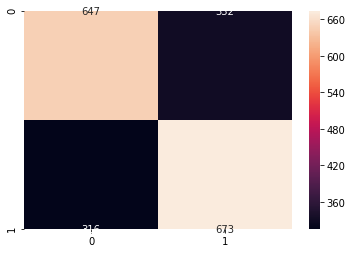

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [95]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_predict_test))

In [179]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

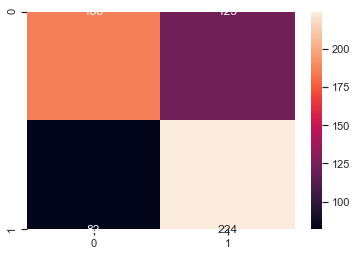

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       309
           1       0.65      0.73      0.69       306

    accuracy                           0.67       615
   macro avg       0.67      0.67      0.67       615
weighted avg       0.67      0.67      0.67       615



In [99]:
print("Test set accuracy: {:.2f}".format(classifier.score(X_test, y_test)))

Test set accuracy: 0.66


In [100]:
import seaborn as sns
sns.set(style="ticks")

#sns.pairplot(exp1)


## svm

In [101]:
X = exp1.drop('teamRslt',axis=1).values
y = exp1['teamRslt'].values

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =5)

In [103]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

/Users/bharat.reddy/miniconda2/envs/mle/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

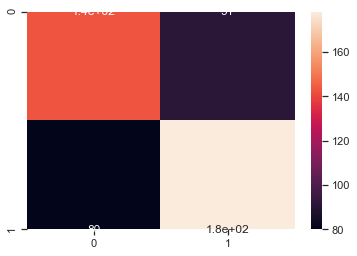

In [105]:
sns.heatmap(cm, annot=True)

In [106]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.61      0.63       234
           1       0.66      0.69      0.68       258

    accuracy                           0.65       492
   macro avg       0.65      0.65      0.65       492
weighted avg       0.65      0.65      0.65       492



Experiment 2 - Drop Oppt


In [107]:
exp1

,teamAbbr,gameTotal,winPCT,teamConf,teamLoc,rank,opptAbbr,opptConf,teamRslt
0,0.137931,0.000000,1.000000,0,0,0.000000,0.241379,1,1
1,0.137931,0.012346,0.500000,0,0,0.214286,0.206897,0,0
2,0.137931,0.024691,0.333333,0,0,0.642857,0.172414,0,0
3,0.137931,0.037037,0.250000,0,0,0.785714,0.413793,0,0
4,0.137931,0.049383,0.200000,0,0,0.857143,0.827586,0,0
...,...,...,...,...,...,...,...,...,...
2455,0.793103,0.950617,0.538462,0,0,0.357143,0.103448,1,0
2456,0.793103,0.962963,0.531646,0,0,0.428571,0.034483,0,0
2457,0.793103,0.975309,0.525000,0,1,0.500000,0.137931,0,0
2458,0.793103,0.987654,0.530864,0,1,0.428571,0.000000,0,1


In [108]:
exp2 = exp1.drop(['opptAbbr', 'teamAbbr'],axis=1)

In [109]:
X = exp2.drop('teamRslt',axis=1).values
y = exp2['teamRslt'].values

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [111]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/bharat.reddy/miniconda2/envs/mle/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

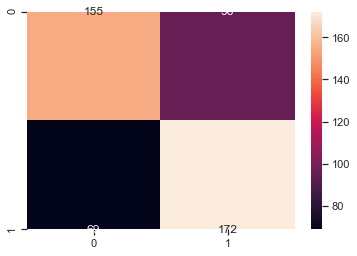

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       251
           1       0.64      0.71      0.68       241

    accuracy                           0.66       492
   macro avg       0.67      0.67      0.66       492
weighted avg       0.67      0.66      0.66       492



In [115]:
exp2

,gameTotal,winPCT,teamConf,teamLoc,rank,opptConf,teamRslt
0,0.000000,1.000000,0,0,0.000000,1,1
1,0.012346,0.500000,0,0,0.214286,0,0
2,0.024691,0.333333,0,0,0.642857,0,0
3,0.037037,0.250000,0,0,0.785714,0,0
4,0.049383,0.200000,0,0,0.857143,0,0
...,...,...,...,...,...,...,...
2455,0.950617,0.538462,0,0,0.357143,1,0
2456,0.962963,0.531646,0,0,0.428571,0,0
2457,0.975309,0.525000,0,1,0.500000,0,0
2458,0.987654,0.530864,0,1,0.428571,0,1


random tree

In [116]:
X = exp2.drop('teamRslt',axis=1).values
y = exp2['teamRslt'].values

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

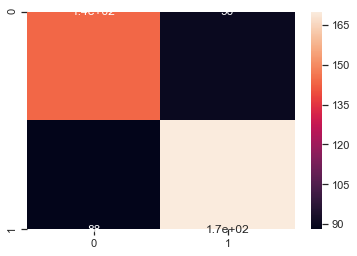

In [120]:
sns.heatmap(cm, annot=True)

In [121]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       234
           1       0.65      0.66      0.66       258

    accuracy                           0.64       492
   macro avg       0.64      0.64      0.64       492
weighted avg       0.64      0.64      0.64       492



In [123]:
#print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

XGBOOST

In [125]:
pip install xgboost


     |████████████████████████████████| 686kB 93kB/s eta 0:00:012
  Created wheel for xgboost: filename=xgboost-0.90-cp36-cp36m-macosx_10_7_x86_64.whl size=1696839 sha256=7b36e1f13740d58f4e79779aaa8df456b7f2876867b670339f15b82a108315d9
  Stored in directory: /Users/bharat.reddy/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost
Note: you may need to restart the kernel to use updated packages.


In [144]:
from xgboost import XGBClassifier

In [145]:
expXG = exp1

In [146]:
expXG


,teamAbbr,gameTotal,winPCT,teamConf,teamLoc,rank,opptAbbr,opptConf,teamRslt
0,0.137931,0.000000,1.000000,0,0,0.000000,0.241379,1,1
1,0.137931,0.012346,0.500000,0,0,0.214286,0.206897,0,0
2,0.137931,0.024691,0.333333,0,0,0.642857,0.172414,0,0
3,0.137931,0.037037,0.250000,0,0,0.785714,0.413793,0,0
4,0.137931,0.049383,0.200000,0,0,0.857143,0.827586,0,0
...,...,...,...,...,...,...,...,...,...
2455,0.793103,0.950617,0.538462,0,0,0.357143,0.103448,1,0
2456,0.793103,0.962963,0.531646,0,0,0.428571,0.034483,0,0
2457,0.793103,0.975309,0.525000,0,1,0.500000,0.137931,0,0
2458,0.793103,0.987654,0.530864,0,1,0.428571,0.000000,0,1


In [147]:
X = expXG.drop('teamRslt',axis=1).values
y = expXG['teamRslt'].values

In [148]:
y.shape

(2460,)

In [162]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


In [163]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [164]:
y_pred = model.predict(X_test)

In [165]:
cm = confusion_matrix(y_test, y_pred)

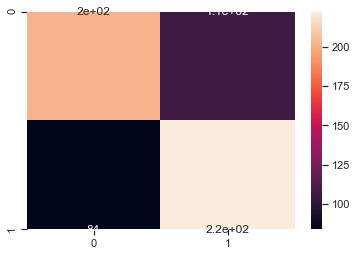

In [166]:
sns.heatmap(cm, annot=True)

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       309
           1       0.67      0.73      0.70       306

    accuracy                           0.69       615
   macro avg       0.69      0.69      0.69       615
weighted avg       0.69      0.69      0.69       615

